In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [55]:
df = pd.read_csv("E:\\Notes\\Statistics\\Feature Engineering\\Datasets\\titanic_toy1.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [56]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [58]:
X_train.isnull().mean()*100 

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

##### **Mean/Median Imputation**

1) **Using Pandas**

In [59]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [60]:
X_train['Mean_Age'] = X_train['Age'].fillna(mean_age)
X_train['Median_Age'] = X_train['Age'].fillna(median_age)

X_train['Mean_Fare'] = X_train['Fare'].fillna(mean_fare)
X_train['Median_Fare'] = X_train['Fare'].fillna(median_fare)

X_train.head()

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


2) **Using Sklearn**

In [61]:
trf = ColumnTransformer([
    ('Mean age', SimpleImputer(strategy='mean'), [0]),
    ('Median age', SimpleImputer(strategy='median'), [0]),
    ('Mean Fare', SimpleImputer(strategy='mean'), [1]),
    ('Median Fare', SimpleImputer(strategy='median'), [1])
], remainder='passthrough')

In [62]:
# X_train = trf.fit_transform(X_train)
# X_test = trf.fit_transform(X_test)

In [63]:
# If the change in variance is too high we will not use this method
print("Original Age Variance", X_train['Age'].var())
print("Mean Age Variance", X_train['Mean_Age'].var())
print('Medain Age Variance', X_train['Median_Age'].var())

Original Age Variance 210.2517072477435
Mean Age Variance 168.85193366872227
Medain Age Variance 169.20731007048155


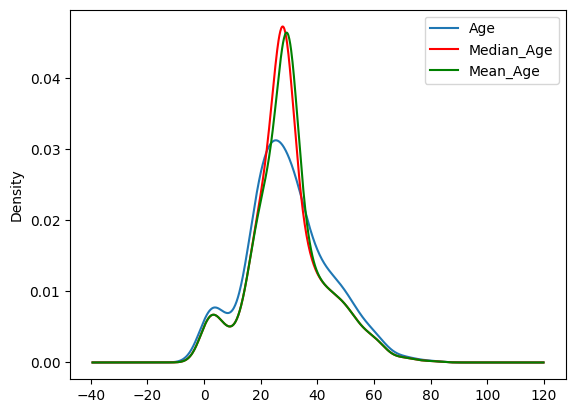

In [64]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Median_Age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Mean_Age'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# We observe change in distribution more towards mean/median

In [65]:
X_train.cov()  #Co-variance

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Mean_Age,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Median_Age,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Mean_Fare,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Median_Fare,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [66]:
X_train.corr() #Co-relation

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Mean_Age,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Median_Age,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Mean_Fare,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Median_Fare,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

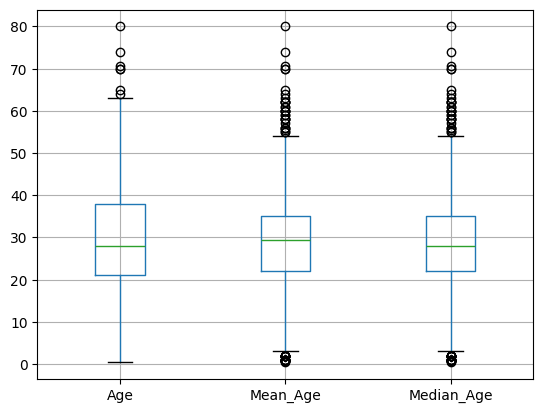

In [67]:
X_train[['Age','Mean_Age','Median_Age']].boxplot()
# We observe more outliers are created

##### **End of Distribution Imputation**

In [68]:
value_age = X_train['Mean_Age'] + 3*np.std(X_train['Mean_Age'])
value_fare = X_train['Mean_Age'] + 3*np.std(X_train['Mean_Age'])

# For Arbitrary Imputation insert any value itself

In [69]:
df1 = df.copy()
df1.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [70]:
X1 = df1.drop(columns=['Survived'])
Y1 = df1['Survived']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [ ]:
X_train['Mean_Age'] = X_train['Age'].fillna(values_age)

NameError: name 'values_age' is not defined

: 